In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [4]:
# Loading x0 and x1 data points
x0 = np.loadtxt('linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('linear_vectorfield_data_x1.txt')

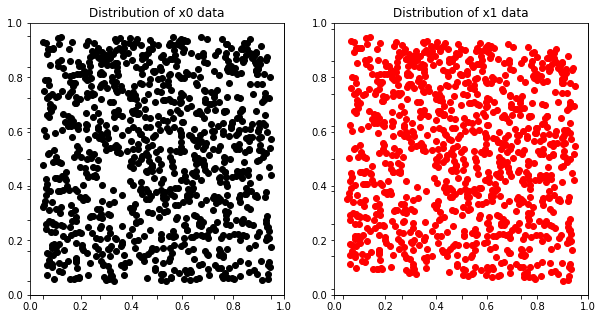

In [100]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.add_subplot(1, 2, 1)
plt.title("Distribution of x0 data")
plt.scatter(x0[:,0],x0[:,1],color="black")
plt.tick_params(axis='both',  labelleft=False,labelbottom=False)

fig.add_subplot(1, 2, 2)
plt.title("Distribution of x1 data")
plt.scatter(x1[:,0],x1[:,1],color="red")
plt.tick_params(axis='both',  labelleft=False, labelbottom=False)



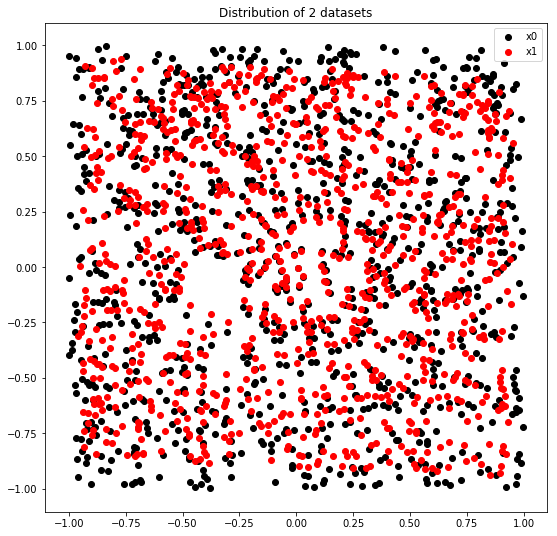

In [27]:
fig = plt.figure(figsize=(9,9))

plt.scatter(x0[:,0],x0[:,1],color='black',label="x0")
plt.scatter(x1[:,0],x1[:,1],color='red',label="x1")
plt.title("Distribution of 2 datasets")
plt.legend()
plt.show()

In [7]:
def findBestDeltaT(X0,X1,t_list):
    min_err = np.inf
    min_t = 0
    errors = []
    for t in t_list:
        v_hat = (x0 - x1) / t
        A_approximated = np.linalg.lstsq(x0, v_hat, rcond=None)[0].T

        x1_hat = (A_approximated.dot(x0.T)).T
        error = ((x1_hat - x1) ** 2).sum()/x1.shape[0]
        errors.append(error)
        if error<min_err:
            min_err = error
            min_t = t
    return min_t,errors

In [101]:
# Finding delta t value with the minimized error from the list [ 10.0,1.0,0.1,0.01,0.001,0.0001 ]
t_list = [10.0,1.0,0.1,0.01,0.001,0.0001]
dt,errors = findBestDeltaT(x0,x1,t_list)

# Best t is 0.1
for i in range(len(t_list)):
    print("Error of "+str(t_list[i])+" t value "+str(errors[i]))
print()
print("Best delta t value : "+str(dt))

v_hat = (x1-x0)/dt

# Approximated matrix A based on least square solution of v_hat = A * x0
A_approx = np.linalg.lstsq(x0, v_hat, rcond=None)[0].T
A_approx

Error of 10.0 t value 0.57490270976445
Error of 1.0 t value 0.49942417813613926
Error of 0.1 t value 0.1793262550092597
Error of 0.01 t value 40.44708633936319
Error of 0.001 t value 4789.998618745178
Error of 0.0001 t value 486972.90709903085

Best delta t value : 0.1


array([[-0.49355245,  0.23191153],
       [-0.4638232 , -0.95737573]])

In [533]:
# Checking the solution
for i in range(5):
    print("Result using approximated A: \t"+str(A_approx.dot(x0[i])))
    print("Original value :\t\t"+str(v_hat[i]))

Result using approximated A: 	[ 0.18409957 -0.34489241]
Original value :		[ 0.18409949 -0.34489229]
Result using approximated A: 	[0.40175684 0.8422011 ]
Original value :		[0.40175684 0.84220121]
Result using approximated A: 	[0.15960623 1.1082559 ]
Original value :		[0.15960619 1.10825597]
Result using approximated A: 	[0.23806159 0.58675241]
Original value :		[0.23806159 0.58675244]
Result using approximated A: 	[0.11990543 0.02143888]
Original value :		[0.11990545 0.02143879]


# Part 2

In [534]:
v_hat = (x0 - x1) / 0.1
A_approximated = np.linalg.lstsq(x0, v_hat, rcond=None)[0].T

# Since our delta t is 0.1, it will end after the first iteration
x1_hat = (A_approximated.dot(x0.T)).T
error = ((x1_hat - x1) ** 2).sum()/x1.shape[0]
error

0.1793262550092597

In [535]:
A_approximated
print(v_hat[0])
A_approximated.dot(x0[0])

[-0.18409949  0.34489229]


array([-0.18409957,  0.34489241])

# Part 3

In [536]:
x_0 = np.array([10, 10])
x_1 = np.empty((1000,2))

In [540]:
x_1[0] = x_0
for t in range(1,1000):
    x_1[t] = A_approximated.dot(x_1[t-1]).T

Text(0.5,1,'Phase space trajectory')

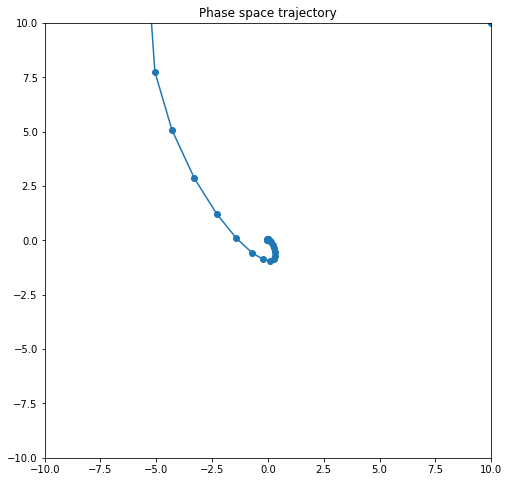

In [541]:
plt.figure(figsize=(8, 8))
x,y = x_1.T
plt.plot(x, y,marker='o')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title("Phase space trajectory")

Text(0.5,1,'Phase Portrait')

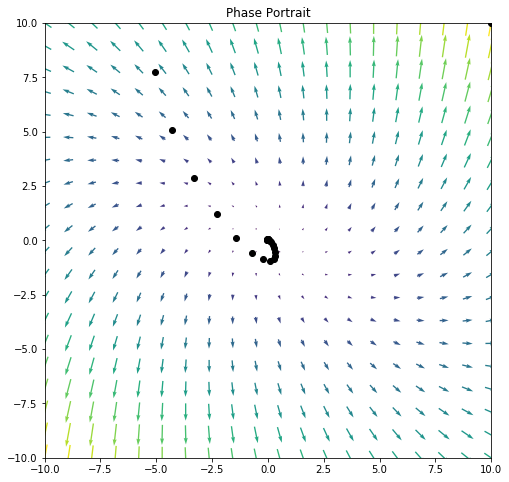

In [542]:

plt.figure(figsize=(8, 8))
x, y = x_1.T
x_mesh = np.linspace(-10, 10, 20)
y_mesh = np.linspace(-10, 10, 20)
x1 , y1  = np.meshgrid(x_mesh, y_mesh)

u = A_approximated[0][0] * x1 + A_approximated[0][1] * y1
v = A_approximated[1][0] * x1 + A_approximated[1][1] * y1


axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([-10,10])

plt.quiver(x1, y1, u, v, M, pivot='mid')
plt.plot(x, y,marker='o',linestyle='None',color='black')
plt.title("Phase Portrait")
